In [1]:
%matplotlib inline

In [2]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [147]:
data = ps.read_csv("../data/multiphase/results.csv")
data['vinf_cl'] = data['vinf_cl']/100.0
data['sigma_cl'] = data['sigma_cl']/100.0
data['chisq'] = data['chisq']/1000.0
f_escape = ps.read_csv("../data/multiphase/fesc_clumpy.csv")

In [148]:
data.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,2488.000000,2488.000000,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.000000,2488.000000,2488.0,2488.0,...,2488.0,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.0,2488.000000,2488.000000,2488.000000,2488.000000
mean,1243.500000,1751.326718,0.503793,1.003851e+07,19765.405626,0.273294,1.812311,35.947663,0.0,5000.0,...,123456.0,1243.500000,7.824821e-08,0.624261,115.141952,5000.0,0.523471,52.405229,4.032134,0.014685
std,718.368058,719.642994,0.290414,1.238160e+07,12517.563531,0.254519,0.408114,34.963937,0.0,0.0,...,0.0,718.368058,1.866427e-07,0.731703,49.115420,0.0,0.272641,27.270420,2.309054,0.022529
min,0.000000,501.423700,0.000239,3.000902e+05,5008.272000,0.030007,1.100000,1.223492,0.0,5000.0,...,123456.0,0.000000,1.005050e-12,0.030072,30.036630,5000.0,0.000000,5.029782,0.000000,0.000100
25%,621.750000,1136.036250,0.257945,1.113740e+06,9150.848250,0.070621,1.460000,15.125707,0.0,5000.0,...,123456.0,621.750000,3.505727e-11,0.090140,72.363635,5000.0,0.285647,28.462385,2.057580,0.000627
50%,1243.500000,1733.591500,0.498750,4.183082e+06,16161.255000,0.165121,1.820000,27.170776,0.0,5000.0,...,123456.0,1243.500000,1.174529e-09,0.291594,114.176400,5000.0,0.523024,51.810935,3.985576,0.003414
75%,1865.250000,2365.887500,0.754240,1.489513e+07,28610.990000,0.412259,2.170000,48.308329,0.0,5000.0,...,123456.0,1865.250000,3.257601e-08,0.912260,158.348575,5000.0,0.757124,75.430875,6.080597,0.017760
max,2487.000000,2998.644000,0.999992,4.977452e+07,49941.730000,0.998844,2.500000,577.597787,0.0,5000.0,...,123456.0,2487.000000,9.980237e-07,2.996807,199.968800,5000.0,0.999976,99.964350,7.996633,0.099932


In [149]:
f_escape.describe()

,fesc_ion,fesc_lya
count,2.488000e+03,2488.000000
mean,3.685580e-02,0.601677
std,6.217918e-02,0.301803
min,1.789721e-51,0.003388
25%,4.061992e-03,0.349413
50%,1.199195e-02,0.662721
75%,3.762593e-02,0.881001
max,4.642314e-01,0.998857


In [150]:
chisq = data.chisq
n_models = len(chisq)
n_best = n_models//100
print(n_best, n_models)
min_chisq = chisq.min()
sorted_id = np.argsort(chisq)
ii = sorted_id[:n_best]
best_models = data.loc[ii]
f_esc_best_models = f_escape.loc[ii]
print (len(chisq[ii]), chisq[ii].min(), chisq[ii].max())

24 2488
24 1.22349179685 3.3176637987


In [151]:
best_models.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,24.000000,24.000000,24.000000,2.400000e+01,24.00000,24.000000,24.000000,24.000000,24.0,24.0,...,24.0,24.000000,2.400000e+01,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000
mean,1182.250000,1895.672554,0.717487,7.562043e+06,18246.77400,0.352340,1.861667,2.614004,0.0,5000.0,...,123456.0,1182.250000,2.685474e-08,0.613898,111.008893,5000.0,0.686969,57.118138,0.778487,0.015617
std,699.995295,707.974202,0.245065,9.271154e+06,12455.20063,0.280082,0.490711,0.574928,0.0,0.0,...,0.0,699.995295,4.841090e-08,0.795082,48.532737,0.0,0.179982,31.798603,0.716584,0.018741
min,82.000000,504.174300,0.120166,3.429846e+05,5914.17000,0.036967,1.100000,1.223492,0.0,5000.0,...,123456.0,82.000000,1.633967e-12,0.035852,35.356710,5000.0,0.329119,11.162080,0.013727,0.000118
25%,648.750000,1274.541000,0.507066,1.143306e+06,8348.76750,0.110858,1.357500,2.245848,0.0,5000.0,...,123456.0,648.750000,8.292898e-11,0.089363,78.398315,5000.0,0.587285,29.748372,0.348064,0.000930
50%,1188.000000,1794.375500,0.809354,4.289278e+06,14717.78000,0.288413,2.050000,2.751385,0.0,5000.0,...,123456.0,1188.000000,3.574744e-09,0.245696,103.294850,5000.0,0.682460,63.232940,0.534096,0.007387
75%,1840.000000,2491.334750,0.908377,1.017899e+07,24020.26750,0.609372,2.292500,3.106487,0.0,5000.0,...,123456.0,1840.000000,2.757418e-08,0.876787,138.824425,5000.0,0.834027,83.846137,0.983063,0.028752
max,2423.000000,2977.269000,0.963844,3.379341e+07,49324.64000,0.909925,2.470000,3.317664,0.0,5000.0,...,123456.0,2423.000000,2.014545e-07,2.795542,198.651900,5000.0,0.968595,99.007000,2.704712,0.062258


In [152]:
f_esc_best_models.describe()

,fesc_ion,fesc_lya
count,24.000000,24.000000
mean,0.020993,0.620842
std,0.053406,0.275685
min,0.000092,0.109405
25%,0.004185,0.399908
50%,0.008759,0.722206
75%,0.012476,0.808847
max,0.267885,0.983714


In [176]:
def plot_distros(fullsample, subsample, chi2sub, labelx='x', filename='x'):
    fig = plt.figure(1, figsize=(11,5))
    plt.clf()
    #plt.rc('text', usetex=True,)
    plt.rc('font', family='serif', size=18)
    #plt.set_ticklabels(ax, size=35)
    n_full = len(fullsample)
    n_sub = len(subsample)
    #print type(fullsample)
    #print fullsample
    int_full = np.linspace(0.0,1.0,n_full)
    int_sub = np.linspace(0.0, 1.0, n_sub)
   
    plt.subplot(121)
    plt.plot(np.sort(fullsample), int_full ,label=r'${\rm Full\ Sample}$', linewidth=3)
    plt.plot(np.sort(subsample), int_sub, label=r'${\rm Best\ Sample}$', linewidth=3, linestyle='--')
    plt.legend(loc=2, prop={'size':18})
    
    ks_stat, p_value = stats.ks_2samp(fullsample, subsample)
    
    ax = plt.gca()
    plt.xlabel(labelx, fontsize=20)
    plt.ylabel(r'${\rm Integrated\ Distribution}$', fontsize=15)
    
    plt.subplot(122)
    plt.scatter(subsample, chi2sub, s=200 ,color ='black', alpha=0.5)
    
    ax = plt.gca()
    plt.xlabel(labelx, fontsize=20)
    plt.ylabel(r'$\chi^2/1000$', fontsize=15)
    
    plt.savefig(str(filename)+'.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
    return ks_stat, p_value

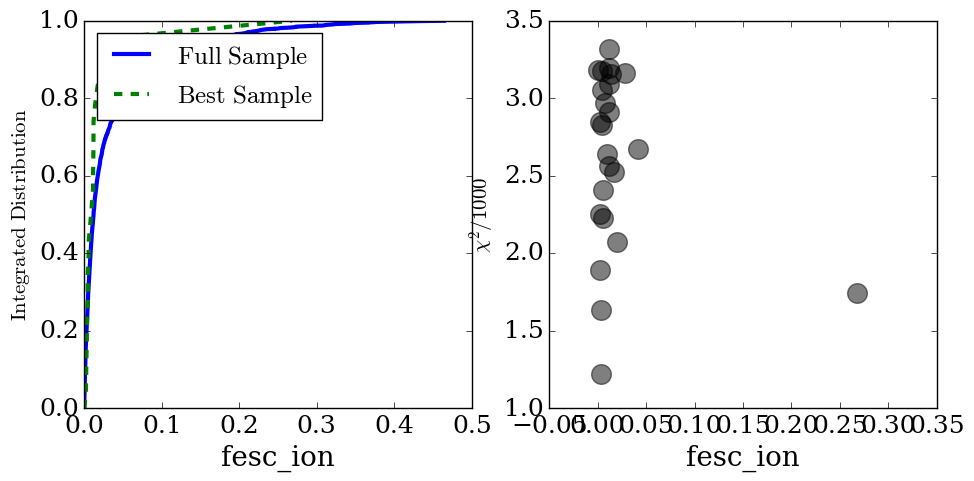

[ 0.30849871  0.87590317  1.7960864 ]
Pvalue 0.08503413196382655


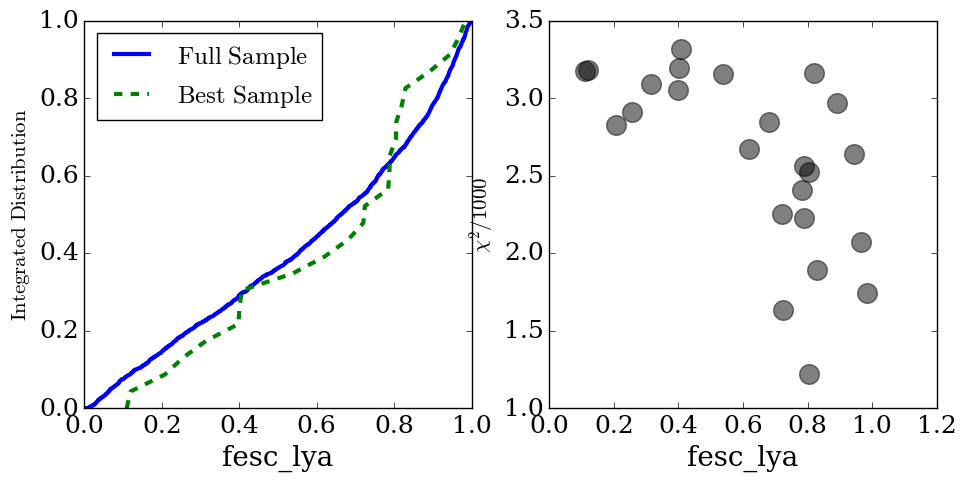

Pvalue 0.5917376493732495


In [177]:
ks_stat, p_value = plot_distros(f_escape['fesc_ion'].values, f_esc_best_models['fesc_ion'].values,
                     best_models['chisq'].values, labelx='fesc_ion', filename='fesc_ion')
best_q =  f_esc_best_models['fesc_ion'].quantile([0.16,0.50,0.84])
print (best_q.values * 100)
print ("Pvalue {}".format(p_value))
ks_stat, p_value = plot_distros(f_escape[' fesc_lya'].values, f_esc_best_models[' fesc_lya'].values,
                     best_models['chisq'].values, labelx='fesc_lya', filename='fesc_lya')
print ("Pvalue {}".format(p_value))

----
sigma_cl
0.556620929453
[ 0.51543889  0.6824597   0.87201846]


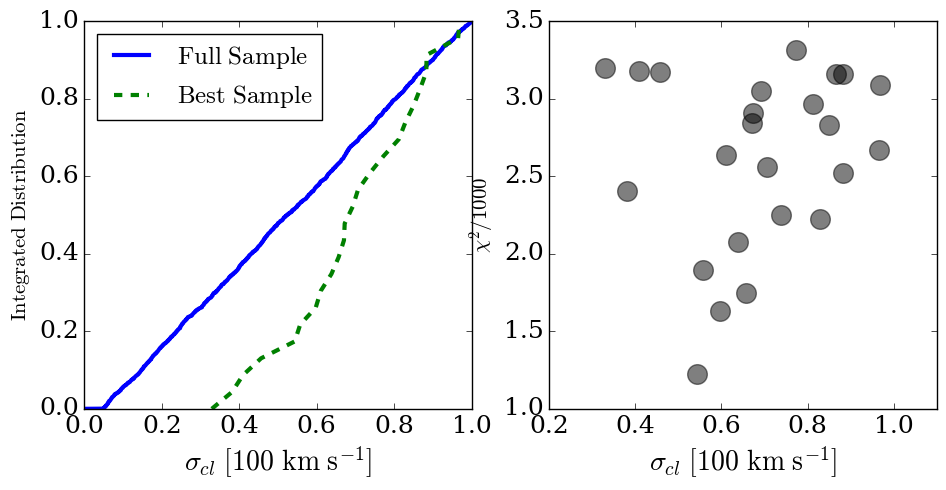

Pvalue 0.004272867786682718
----
T_ICM
0.898793015282
[ 5.89691261  6.63238414  7.24399679]


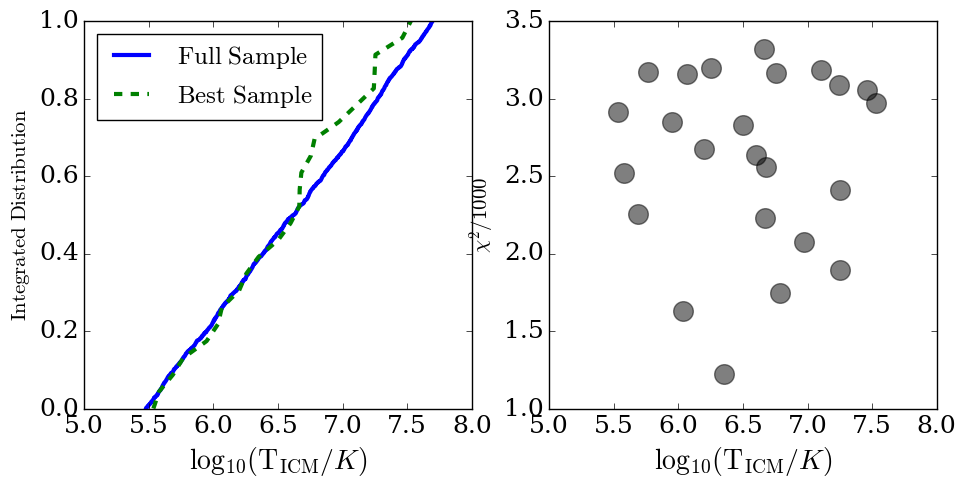

Pvalue 0.7534460853511333
----
T_cl
0.904527512647
[ 3.91607847  4.16784231  4.52592122]


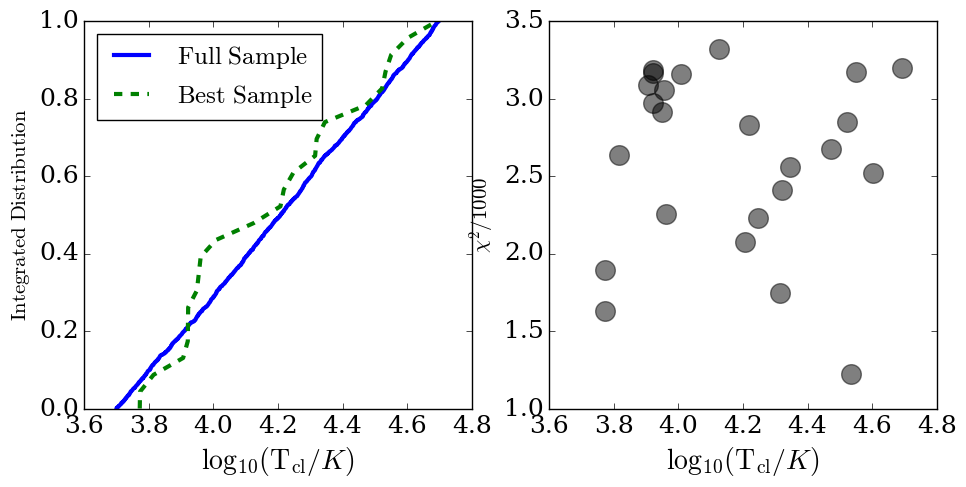

Pvalue 0.4862907326067125
----
vinf_cl
0.220555744907
[ 0.19458896  0.5340958   1.39179152]


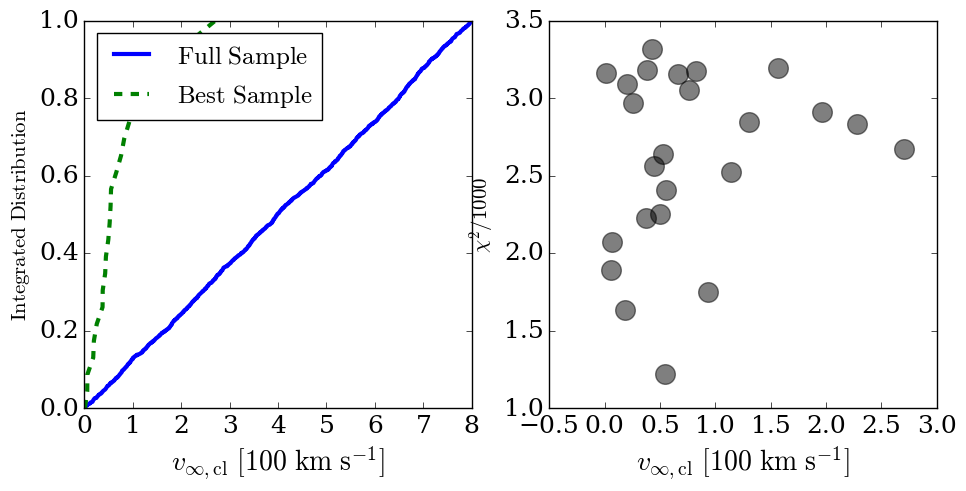

Pvalue 1.1002227678843421e-10
----
P_cl
0.767736967819
[ 0.41316314  0.8093545   0.93824359]


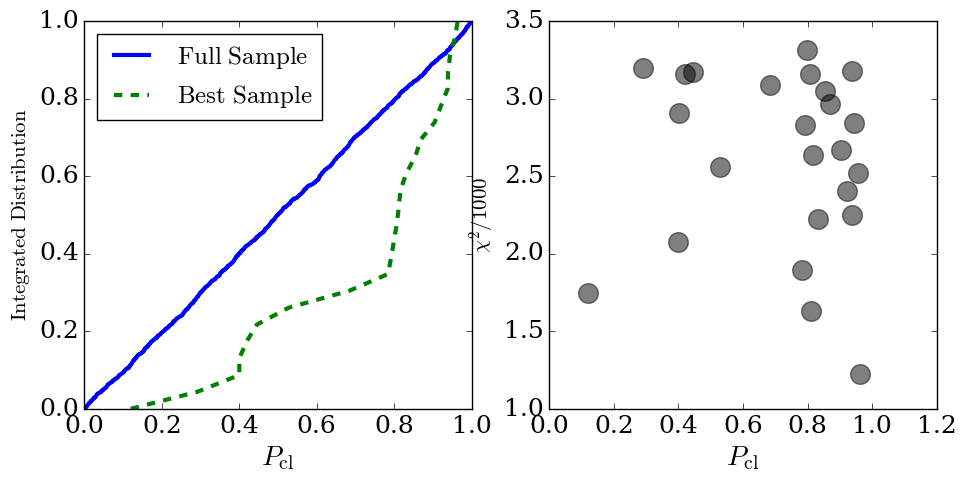

Pvalue 7.998373701520261e-05


In [178]:
column_log= ['T_ICM', 'n_HI_ICM', 'T_cl', 'n_HI_cl', 'zeta_Z']
column_lin = ['H_em', 'P_cl', 'f_cl', 'sigma_i', 'beta_cl', 'sigma_cl', 'vinf_cl', 'r_cl']
columns = []
change = [] 
values = []
p_values = []

try_columns = ['T_ICM', 'n_HI_ICM', 'T_cl', 'n_HI_cl', 'zeta_Z','H_em', 
              'P_cl', 'f_cl', 'sigma_i', 'beta_cl', 'sigma_cl', 'vinf_cl', 'r_cl']
try_columns = ['sigma_cl', 'T_ICM', 'T_cl', 'vinf_cl', 'P_cl']
units = {
        'sigma_cl':'$\sigma_{cl}\ [100\ \mathrm{km\ s^{-1}}]$', 
        'T_ICM' : '$\log_{10}(\mathrm{T_{ICM}} / K)$',
            'T_cl' : '$\log_{10}(\mathrm{T_{cl}} / K)$',
        'vinf_cl' : '$v_{\infty,\mathrm{cl}}\ [100\ \mathrm{km\ s^{-1}]}$',
        'P_cl': '$P_{\mathrm{cl}}$'
        }
for column in try_columns:
    if column in column_log:
        print ("----")
        print (column)
        best_q = np.log10(best_models[column].quantile([0.16,0.50,0.84]))
        all_q = np.log10(data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print(delta_best/delta_all)
        print(best_q.values)
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
        _, pv = plot_distros(np.log10(data[column].values), np.log10(best_models[column].values), 
                     best_models['chisq'].values, labelx=units[column], filename=column)
        p_values.append(pv)
        print ("Pvalue {}".format(pv))
    if column in column_lin:
        print("----")
        print(column)
        best_q = (best_models[column].quantile([0.16,0.50,0.84]))
        all_q = (data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print(delta_best/delta_all)
        print(best_q.values)
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
        _,pv = plot_distros((data[column].values), (best_models[column].values),
                     best_models['chisq'].values, labelx=units[column], filename=column)
        p_values.append(pv)
        print("Pvalue {}".format(pv))
        #print column


# Exploring around the $\chi^2$ minimum

In [156]:
vinf_cl = best_models['vinf_cl'].values
sigma_cl = best_models['sigma_cl'].values
p_cl = best_models['P_cl'].values
chi2 = best_models['chisq'].values

best_model = np.argmin(chi2)
best_vinf_cl = vinf_cl[best_model]
best_sigma_cl = sigma_cl[best_model]
best_p_cl = p_cl[best_model]
best_chi2 = chi2[best_model]
print (best_vinf_cl, best_sigma_cl, best_p_cl, best_chi2)

0.5435024 0.5431802 0.9638437 1.22349179685


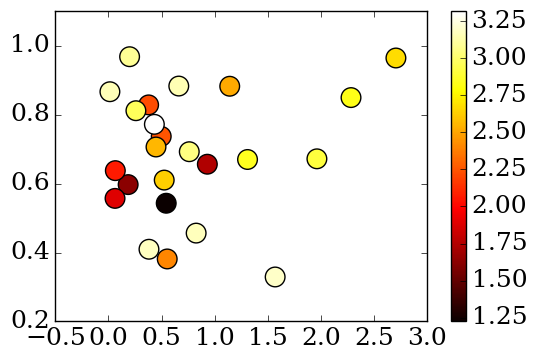

In [157]:
plt.scatter(vinf_cl, sigma_cl, c=chi2, cmap='hot', s=200)
plt.colorbar()

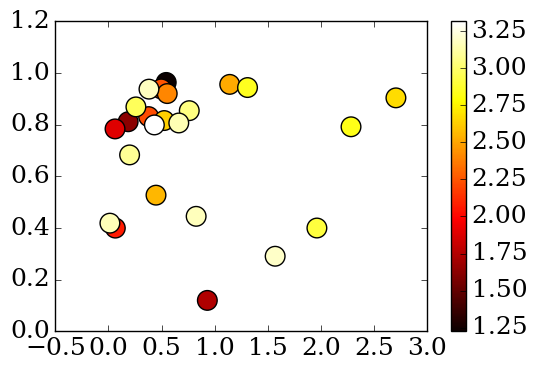

In [145]:
plt.scatter(vinf_cl, p_cl, c=chi2, cmap='hot', s=200)
plt.colorbar()

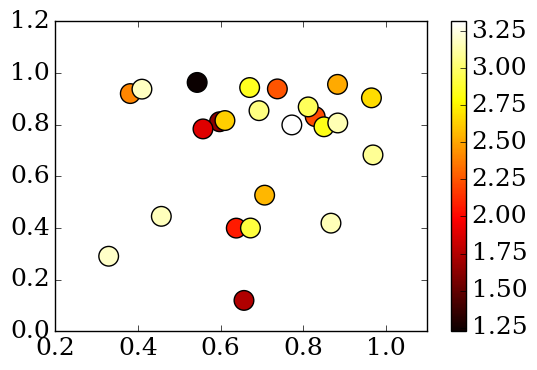

In [158]:
plt.scatter(sigma_cl, p_cl, c=chi2, s=200, cmap='hot')
plt.colorbar()

In [18]:
x = vinf_cl - best_vinf_cl
y = sigma_cl - best_sigma_cl
z = p_cl - best_p_cl
w = chi2 -  best_chi2
def residuals(p):
    f = x**2/(2.0*p[0]**2)
    f += y**2/(2.0*p[1]**2)
    f += z**2/(2.0*p[2]**2)
    res = np.sum((w - f)**2)/1E6
    return res

def model(p):
    f = x**2/(2.0*p[0]**2)
    f += y**2/(2.0*p[1]**2)
    f += z**2/(2.0*p[2]**2)
    return f

In [19]:
from scipy.optimize import minimize

methods = ['Nelder-Mead','Powell', 'CG', 'BFGS','L-BFGS-B','TNC','COBYLA', 'SLSQP']

for method in methods:
    p = [ 5.0,  5.0,  0.1]
    res = minimize(residuals,p,method=method, tol=1e-6, options={'maxiter':2000, 'disp':True})
    p_min = res['x']
    print method, p_min, res['fun']

Optimization terminated successfully.
         Current function value: 62.317146
         Iterations: 303
         Function evaluations: 539
Nelder-Mead [ 5.16044587 -0.58278666  0.01416063] 62.3171461169
Optimization terminated successfully.
         Current function value: 62.317146
         Iterations: 6
         Function evaluations: 311
Powell [ 5.16041639  0.58278812 -0.01416067] 62.3171461205
         Current function value: 87.440160
         Iterations: 23
         Function evaluations: 377
         Gradient evaluations: 73
CG [ 5.09677074  0.51424981 -9.34051775] 87.4401596499
         Current function value: 66.047745
         Iterations: 27
         Function evaluations: 387
         Gradient evaluations: 75
BFGS [ 5.11802215  0.51403909  0.01534657] 66.0477447822
L-BFGS-B [ 4.98149686  4.99822357  0.01154854] 105.336777753
TNC [ 5.15921157  0.58282589  0.01416032] 62.3171480425
COBYLA [ 3.65917265  4.68335494  0.01183419] 102.207085786
Optimization terminated successfully.

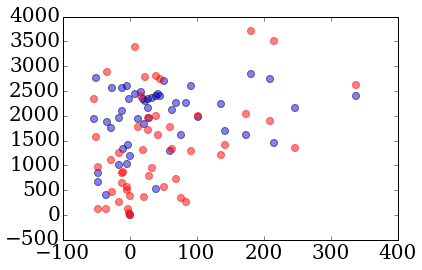

In [20]:
p = [ 5.15921157 , 0.58282589,  0.01416032]
chi2_m = model(p)
plt.scatter(x, w, s=50, alpha=0.5)
plt.scatter(x, chi2_m, color='red', s=50.0, alpha=0.5)

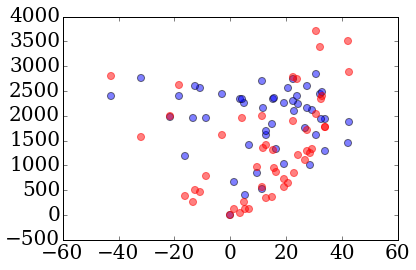

In [21]:
plt.scatter(y, w, s=50, alpha=0.5)
plt.scatter(y, chi2_m, color='red', s=50.0, alpha=0.5)

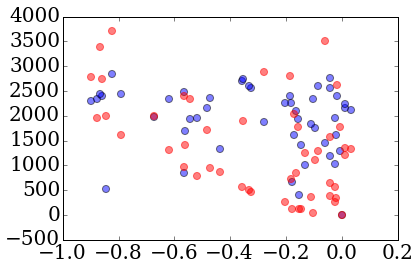

In [22]:
plt.scatter(z, w, s=50, alpha=0.5)
plt.scatter(z, chi2_m, color='red', s=50.0, alpha=0.5)

In [29]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy import units as u
sigma_clouds= np.array([best_sigma_cl-p[1], best_sigma_cl, best_sigma_cl+p[1]])

r = 2.25 * kpc.to('cm')
print r
sigma = sigma_clouds * u.kilometer / u.second
print sigma
dynamical_mass = 3 * r * sigma **2 / (2.0*G.cgs)
dynamical_mass.to('M_sun')

6.9427745583e+21 cm
[ 53.73519411  54.31802     54.90084589] km / s


<Quantity [  2.26521568e+09,  2.31462040e+09,  2.36455808e+09] solMass>

In [24]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy.cosmology import default_cosmology
from barak import virial
n_points = 100
z = 0.0
mass = np.logspace(9,12,n_points)
mu = 0.59
km = 1e5
cosmo = default_cosmology.get()
rho_virial = virial.deltavir(z, cosmo=cosmo) * cosmo.critical_density(z) 
M_g = mass * M_sun.cgs
rvir = ((3 * M_g) / (4 * np.pi * rho_virial))**(1./3)
#print rvir.to('kpc')
vcirc = np.sqrt(G.cgs * M_g / rvir)
#print vcirc.to('km/s')
Tvir = mu * m_p.cgs * vcirc * vcirc / (2 * k_B.cgs)
#print Tvir.to('Kelvin')

In [ ]:
data_update = ps.read_csv("../data/multiphase/results_2.csv")
chisq = best_models['chisq'].values
chisq_update = data_update['chisq'].values
sigma_cl_update = data_update['sigma_cl'].values

In [ ]:
chisq.sort()
chisq_update.sort()

In [ ]:
plt.plot(chisq/100.0, np.linspace(0.0,1.0, len(chisq)))
plt.plot(chisq_update/100, np.linspace(0.0,1.0, len(chisq_update)))
plt.xlim(0,30)

In [ ]:
plt.scatter(sigma_cl_update, chisq_update)